# Atividade 7 - Arthur Cerveira
## Exercício 1: Modelos de Ruído

O exercício 1 consiste em adicionar diferentes ruídos a imagem com a função `imnoise`. Para utilizar essa função, foi necessário carregar o pacote `image`, e para aplicar o filtro gaussiano com médias diferentes de 0, foi necessário converter a imagem original para o tipo `double`. A imagem original e seus ruídos estão apresentados abaixo.

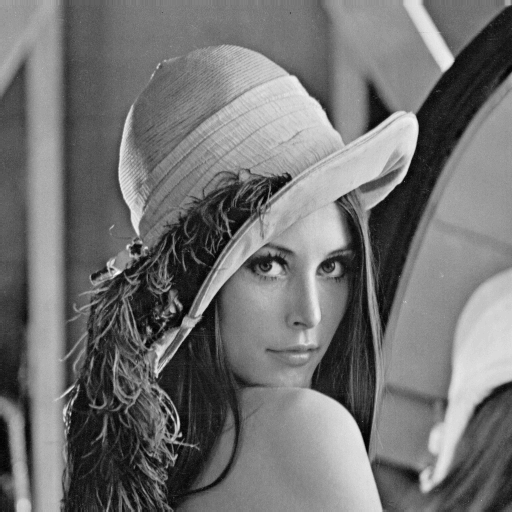

In [1]:
lenna = imread('./images/lena_cinza.bmp');
imshow(lenna);

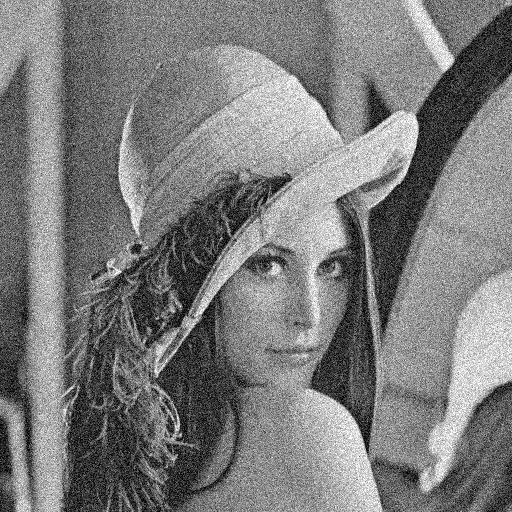

In [2]:
pkg load image

ruido = imnoise(lenna,'gaussian', 0, 0.01);
imshow(ruido);

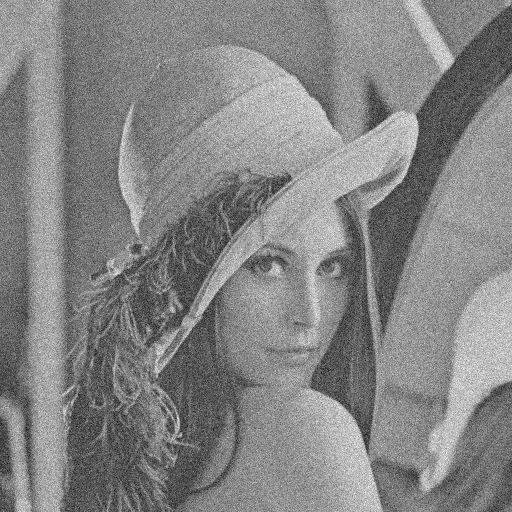

In [3]:
dblImage = im2double(lenna);

ruido = imnoise(dblImage,'gaussian', 30, 0.01);
imshow(ruido, []);

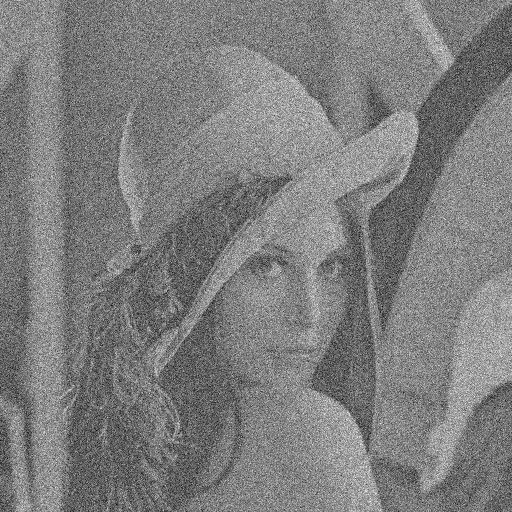

In [4]:
ruido = imnoise(dblImage,'gaussian', 50, 0.05);
imshow(ruido, []);

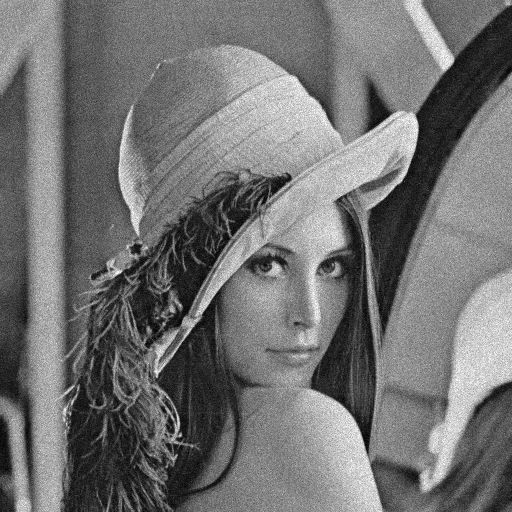

In [5]:
ruido = imnoise(lenna,'poisson');
imshow(ruido);

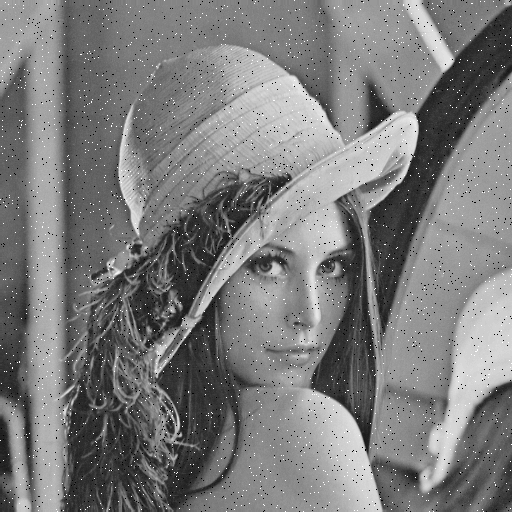

In [6]:
ruido = imnoise(lenna,'salt & pepper', 0.02);
imshow(ruido);

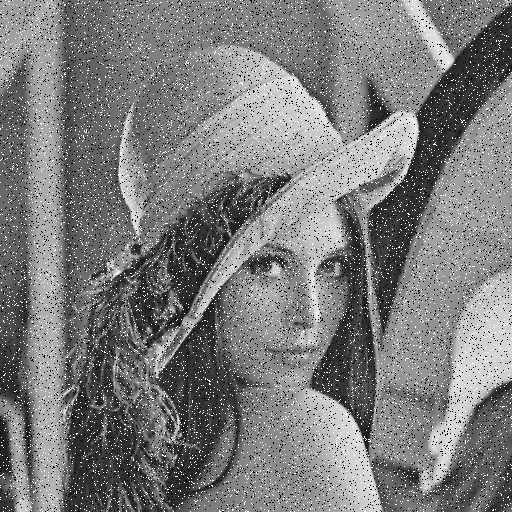

In [7]:
ruido = imnoise(lenna,'salt & pepper', 0.1);
imshow(ruido);

## Exercício 2: Restauração com Filtro de Média

O exercício 2 consiste na implementação de uma função que filtre uma imagem com o filtro de média, selecionando o tamanho do filtro de acordo com o parâmetro N. Pode-se observar que esse não é o melhor filtro para tratar ruído de tipo sal e pimenta.

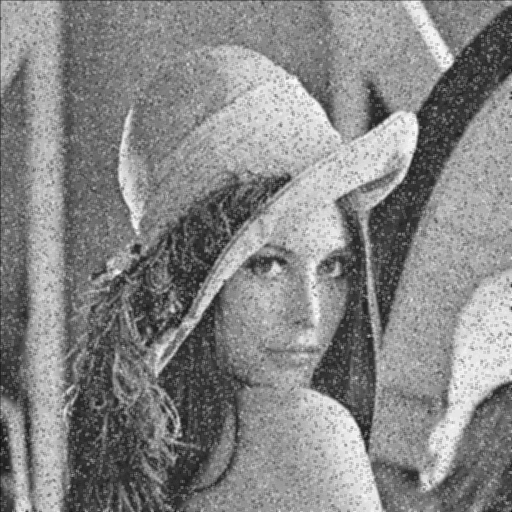

In [8]:
function figura_out = restaura_media (figura_in, N)
    image = imread(strcat('images/', figura_in));
    [width, height] = size(image);
    
    filter_size = N - 1;

    % Fill image with zeros
    image = [zeros(width, 1), image, zeros(width, 1)];
    % Transpose matrix, add zeros, transpose back
    image = [zeros(height + 2, 1), image', zeros(height + 2, 1)]';

    figura_out = zeros(width, height, "uint8");

    for i = (1:width)
        for j = (1:height)
            end_i = i + filter_size;
            
            if (end_i > width)
                end_i = width;
            endif
            
            end_j = j + filter_size;
            
            if (end_j > height)
                end_j = height;
            endif
            
            window = image(i:end_i, j:end_j);
            
            % Flatten the window
            window = reshape(window',1,[]);

            figura_out(i, j) = mean(window);
        endfor
    endfor 
endfunction

fig = restaura_media("lena_sal_e_pimenta.jpg", 3);
imshow(fig);

## Exercício 3: Restauração com Filtro de Mediana

O exercício 3 consiste na implementação de uma função que filtre uma imagem com o filtro de mediana, selecionando o tamanho do filtro de acordo com o parâmetro N. Pode-se observar que esse filtro apresentou melhores resultados no tratamento do ruído de tipo sal e pimenta.

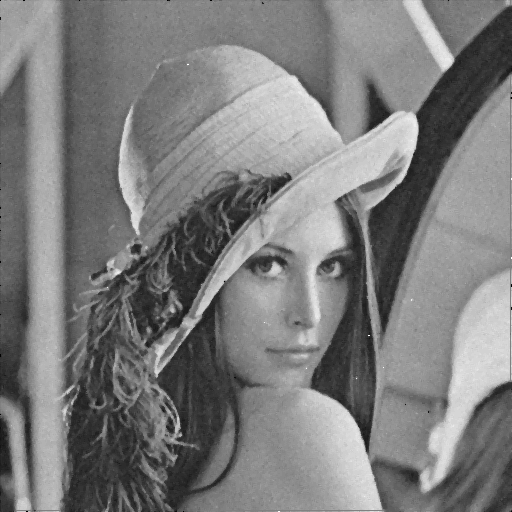

In [9]:
function figura_out = restaura_mediana (figura_in, N)
    image = imread(strcat('images/', figura_in));
    [width, height] = size(image);
    
    filter_size = N - 1;

    % Fill image with zeros
    image = [zeros(width, 1), image, zeros(width, 1)];
    % Transpose matrix, add zeros, transpose back
    image = [zeros(height + 2, 1), image', zeros(height + 2, 1)]';

    figura_out = zeros(width, height, "uint8");

    for i = (1:width)
        for j = (1:height)
            end_i = i + filter_size;
            
            if (end_i > width)
                end_i = width;
            endif
            
            end_j = j + filter_size;
            
            if (end_j > height)
                end_j = height;
            endif
            
            window = image(i:end_i, j:end_j);
            
            % Flatten the window
            window = reshape(window',1,[]);

            figura_out(i, j) = median(window);
        endfor
    endfor 
endfunction

fig = restaura_mediana("lena_sal_e_pimenta.jpg", 3);
imshow(fig);

## Exercício 4: Quantização de cores com YCbCr

O exercício 4 consiste na implementação de uma função que quantize as cores de uma imagem no espaço de cores YCbCr. A quantização em 2 bits dos canais de crominância modificou de forma explícita as cores da imagem, enquanto a quantização em 4 bits apresenta uma diferença menos perceptível da imagem original.

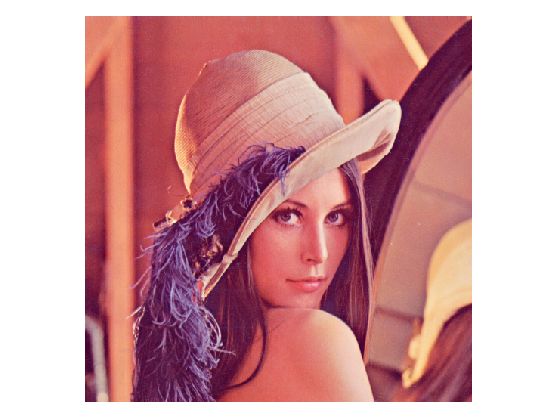

In [10]:
lenna = imread('./images/Lenna.png');
imshow(lenna);

In [11]:
pkg load image

function Quantiza(entrada, saida, bitsY, bitsCb, bitsCr)
    imagem = imread(strcat('images/', entrada));

    YCbCr = rgb2ycbcr(imagem);

    Y = YCbCr(:, :, 1);
    Cb = YCbCr(:, :, 2);
    Cr = YCbCr(:, :, 3);
    
    bits = 256 / (2 ** bitsY);
    quant_Y = idivide(Y, bits) * bits;

    bits = 256 / (2 ** bitsCb);
    quant_Cb = idivide(Cb, bits) * bits;

    bits = 256 / (2 ** bitsCr);    
    quant_Cr = idivide(Cr, bits) * bits;
    
    recImage = cat(3, quant_Y, quant_Cb, quant_Cr);
    
    rgb = ycbcr2rgb(recImage);
    
    imwrite(rgb, saida);    
endfunction

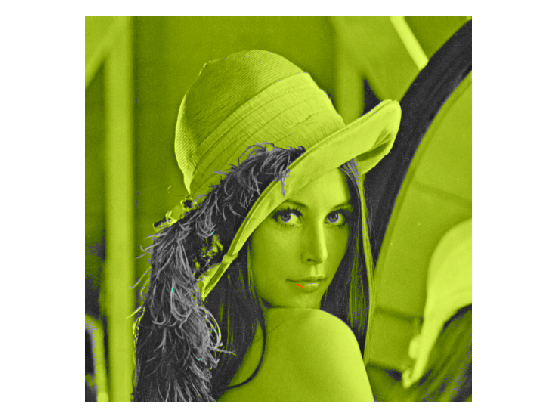

In [12]:
Quantiza('Lenna.png', './images/Lenna_2bits.png', 8, 2, 2);

lenna4bits = imread('./images/Lenna_2bits.png');
imshow(lenna4bits);

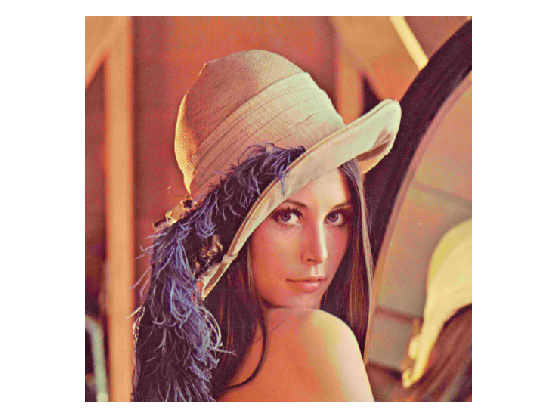

In [13]:
Quantiza('Lenna.png', './images/Lenna_4bits.png', 8, 4, 4);

lenna4bits = imread('./images/Lenna_4bits.png');
imshow(lenna4bits);